# Bandit Problem

In [209]:
# imports
from bandits import Bandit
import random
# Include your imports here, if any are used. 
import numpy as np
import matplotlib.pyplot as plt

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [210]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [211]:
bandits[0].pullLever()

0.5920074480855421

## Greedy algorithm Implementation

In [212]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    rewards = [0.0 for _ in range(1000)]
    actions = np.arange(1000)
    x = random.randrange(10)
    actions[0] = x
    rewards[0] = bandits[x].pullLever()
    sums = np.array([0.0 for _ in range(10)])
    counts = np.array([0 for _ in range(10)])
    default = 0.0
    expected = np.array([default for _ in range(10)])
    sums[x]+=rewards[0]
    counts[x]+=1
    expected[x]=sums[x]/counts[x]
    for i in range(1, 1000):
        ind = np.argmax(expected == max(expected))
        actions[i]=ind
        rewards[i]=bandits[ind].pullLever()
        sums[ind]+=rewards[i]
        counts[ind]+=1
        expected[ind]=sums[ind]/counts[ind]
    return rewards
    #plt.plot(xs, ys)

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

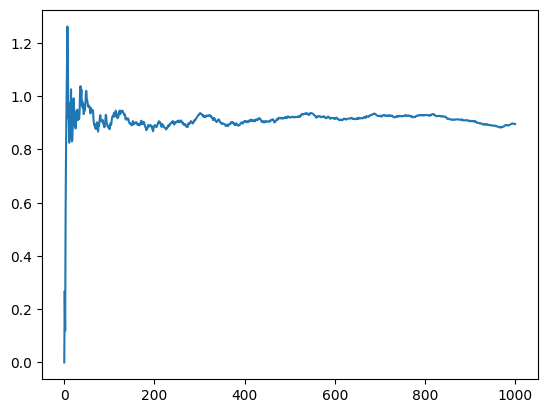

In [213]:
rewards = run_greedy()
xs = np.arange(0,1001)
ys = np.array([0.0 for _ in range(1001)])
s = 0
for i in range(1, 1001):
    s+=rewards[i-1]
    ys[i]=s/i
plt.plot(xs, ys)

## $\epsilon$-greedy Algorithm

In [214]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list

    rewards = np.arange(1000)
    actions = np.arange(1000)
    x = random.randrange(10)
    actions[0] = x
    rewards[0] = bandits[x].pullLever()
    sums = np.array([0.0 for _ in range(10)])
    counts = np.array([0 for _ in range(10)])
    default = 0.0
    expected = np.array([default for _ in range(10)])
    sums[x]+=rewards[0]
    counts[x]+=1
    expected[x]=sums[x]/counts[x]
    for i in range(1, 1000):
        r = random.random()
        ind = 0
        if(r<epsilon):
            ind = random.randrange(10)
        else:
            ind = np.argmax(expected == max(expected))
        actions[i]=ind
        rewards[i]=bandits[ind].pullLever()
        sums[ind]+=rewards[i]
        counts[ind]+=1
        expected[ind]=sums[ind]/counts[ind]
    #plt.plot(xs, ys)
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

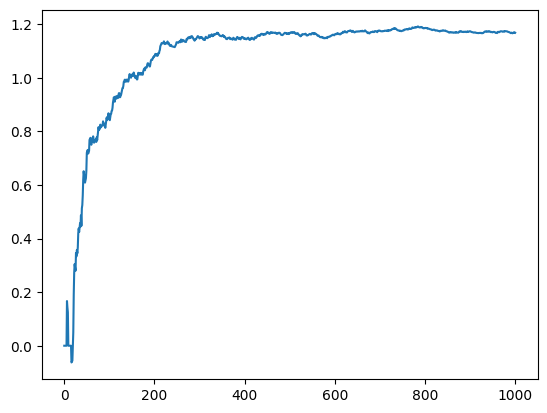

In [215]:
rewards = run_epsilon_greedy(0.01)
xs = np.arange(0,1001)
ys = np.array([0.0 for _ in range(1001)])
s = 0
for i in range(1, 1001):
    s+=rewards[i-1]
    ys[i]=s/i
plt.plot(xs, ys)

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

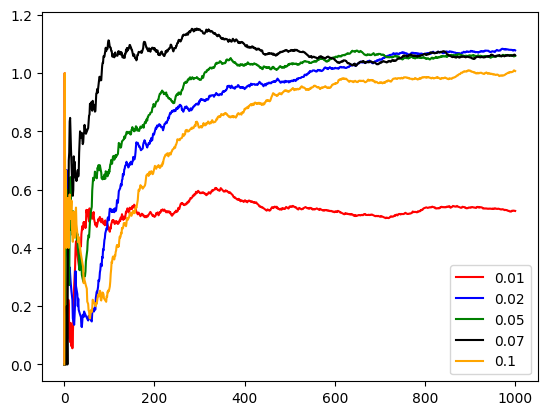

In [216]:
eps=[0.01, 0.02, 0.05, 0.07, 0.1]
xs = np.arange(0,1001)
colors = ["red", "blue", "green", "black", "orange"]
for i in range(5):
    rewards = run_epsilon_greedy(eps[i])
    
    ys = np.array([0.0 for _ in range(1001)])
    s = 0
    for j in range(1, 1001):
        s+=rewards[j-1]
        ys[j]=s/j
    plt.plot(xs, ys, color=colors[i], label=f"{eps[i]}")
plt.legend()
plt.show()

#0.01 is better than 0.1 more number of times but in between 0.01 and 0.1, it is very fiddly, unable to determine which is best (if Q(a) is default 1)
#0.1 is almost always better if default Q(a) is 0

## Optimistic Initial Values

In [217]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here
    # Return the reward from the bandits in a list
    rewards = [0.0 for _ in range(1000)]
    actions = np.arange(1000)
    x = random.randrange(10)
    actions[0] = x
    rewards[0] = bandits[x].pullLever()
    sums = np.array([0.0 for _ in range(10)])
    counts = np.array([0 for _ in range(10)])
    default = 5
    expected = np.array([default for _ in range(10)])
    sums[x]+=rewards[0]
    counts[x]+=1
    expected[x]=sums[x]/counts[x]
    for i in range(1, 1000):
        ind = np.argmax(expected == max(expected))
        actions[i]=ind
        rewards[i]=bandits[ind].pullLever()
        sums[ind]+=rewards[i]
        counts[ind]+=1
        expected[ind]=sums[ind]/counts[ind]
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

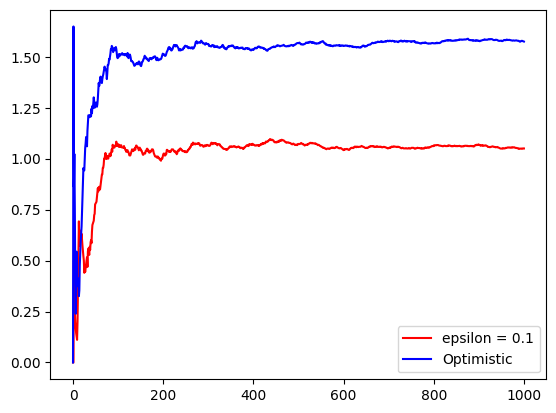

In [218]:
rewards = run_epsilon_greedy(0.1)
xs = np.arange(0,1001)
ys = np.array([0.0 for _ in range(1001)])
s = 0
for i in range(1, 1001):
    s+=rewards[i-1]
    ys[i]=s/i
plt.plot(xs, ys, color="red", label="epsilon = 0.1")
plt.legend()
rewards1 = run_optimistic_greedy()
s = 0
for i in range(1, 1001):
    s+=rewards1[i-1]
    ys[i]=s/i
plt.plot(xs, ys, color="blue", label="Optimistic")
plt.legend()
plt.show()

#Optimistic is almost always better

## Upper Confidence Bound (UCB)

In [219]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    rewards = [0.0 for _ in range(1000)]
    actions = np.arange(1000)
    sums = [0.0 for _ in range(10)]
    counts = [0 for _ in range(10)]
    default = 1e9
    expected = [default for _ in range(10)]
    currsum=rewards[0]
    ys[1]=rewards[0]
    for i in range(1000):
        for j in range(10):
            if (counts[j]!=0):
                expected[j]=(sums[j]/counts[j])+c*np.sqrt(np.log(i)/counts[j])
            
        ind = expected.index(max(expected))
        actions[i]=ind
        rewards[i]=bandits[ind].pullLever()
        sums[ind]+=rewards[i]
        counts[ind]+=1
        currsum+=rewards[i]
    return rewards

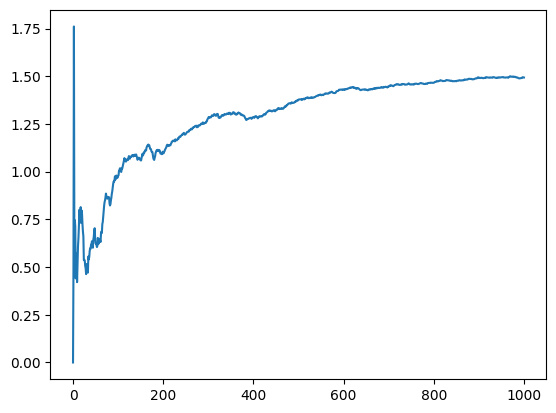

In [ ]:
rewards = run_ucb(2)
xs = np.arange(0,1001)
ys = np.array([0.0 for _ in range(1001)])
s = 0
for i in range(1, 1001):
    s+=rewards[i-1]
    ys[i]=s/i
plt.plot(xs, ys)